In [1]:
from read_penguin import load_3D_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import geometry as geo
from Interpolate import *
from Search import binSearch

In [2]:
def velocity(x, y, z, data):
    xVals = data[1]
    yVals = data[2]
    zVals = data[3]
    xVel = data[6]
    yVel = data[7]
    zVel = data[8]
    
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    zPoints = binSearch(zVals, 0, len(zVals), z)
    if(xPoints[0] == -np.infty):
        return (0,0,0)
    elif(xPoints[1] == np.infty):
        return (0,0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (len(yVals)-2, 0)
    elif(yPoints[1] == np.infty):
        yPoints = (0, len(yVals)-2)
    if(zPoints[0] == -np.infty):
        zPoints = (0,0,0)
    if(zPoints[1] == np.infty):
        if(abs(z-zVals[-1]) < 0.001):
            zPoints = (-1, -1)
        else:
            return (0,0,0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    lowz = zPoints[0]
    highz = zPoints[1]
    
    targetCoords = (x,y,z)
    minCoords = (xVals[lowx], yVals[lowy], zVals[lowz])
    maxCoords = (xVals[highx], yVals[highy], zVals[lowz])
    
    xcubeVals = [xVel[lowz,lowy,lowx], xVel[highz,lowy,lowx], xVel[lowz,highy,lowx], xVel[highz,highy,lowx], xVel[lowz,lowy,highx], xVel[highz, lowy, highx], xVel[lowz, highy, highx], xVel[highz, highy, highx]]
    vx = triInterpolate(targetCoords, xcubeVals, minCoords, maxCoords)
    ycubeVals = [yVel[lowz,lowy,lowx], yVel[highz,lowy,lowx], yVel[lowz,highy,lowx], yVel[highz,highy,lowx], yVel[lowz,lowy,highx], yVel[highz, lowy, highx], yVel[lowz, highy, highx], yVel[highz, highy, highx]]
    vy = triInterpolate(targetCoords, ycubeVals, minCoords, maxCoords)
    zcubeVals = [zVel[lowz,lowy,lowx], zVel[highz,lowy,lowx], zVel[lowz,highy,lowx], zVel[highz,highy,lowx], zVel[lowz,lowy,highx], zVel[highz, lowy, highx], zVel[lowz, highy, highx], zVel[highz, highy, highx]]
    vz = triInterpolate(targetCoords, zcubeVals, minCoords, maxCoords)
    vels = (vx, vy, vz)
    velocity = geo.sphericalToCartesianVelocity(targetCoords, vels, dim=3)
    return velocity

In [3]:
def cartVelocity(x, y, z, data):
    xVals = data[1]
    yVals = data[2]
    zVals = data[3]
    xVel = data[6]
    yVel = data[7]
    zVel = data[8]
    
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    zPoints = binSearch(zVals, 0, len(zVals), z)
    if(xPoints[0] == -np.infty):
        return (0,0,0)
    elif(xPoints[1] == np.infty):
        return (0,0,0)
    if(yPoints[0] == -np.infty):
        return (0,0,0)
    elif(yPoints[1] == np.infty):
        return (0,0,0)
    if(zPoints[0] == -np.infty):
        return (0,0,0)
    if(zPoints[1] == np.infty):
        return (0,0,0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    lowz = zPoints[0]
    highz = zPoints[1]
    
    targetCoords = (x,y,z)
    minCoords = (xVals[lowx], yVals[lowy], zVals[lowz])
    maxCoords = (xVals[highx], yVals[highy], zVals[lowz])
    
    xcubeVals = [xVel[lowz,lowy,lowx], xVel[highz,lowy,lowx], xVel[lowz,highy,lowx], xVel[highz,highy,lowx], xVel[lowz,lowy,highx], xVel[highz, lowy, highx], xVel[lowz, highy, highx], xVel[highz, highy, highx]]
    vx = triInterpolate(targetCoords, xcubeVals, minCoords, maxCoords)
    
    ycubeVals = [yVel[lowz,lowy,lowx], yVel[highz,lowy,lowx], yVel[lowz,highy,lowx], yVel[highz,highy,lowx], yVel[lowz,lowy,highx], yVel[highz, lowy, highx], yVel[lowz, highy, highx], yVel[highz, highy, highx]]
    vy = triInterpolate(targetCoords, ycubeVals, minCoords, maxCoords)
    
    zcubeVals = [zVel[lowz,lowy,lowx], zVel[highz,lowy,lowx], zVel[lowz,highy,lowx], zVel[highz,highy,lowx], zVel[lowz,lowy,highx], zVel[highz, lowy, highx], zVel[lowz, highy, highx], yVel[highz, highy, highx]]
    vz = triInterpolate(targetCoords, ycubeVals, minCoords, maxCoords)
    
    vels = (vx, vy, vz)
    return geo.cartesianToSphericalVelocity(targetCoords, vels, dim=3)

In [4]:
#Loading Data
xres = 384
yres = 768
zres = 216
data = load_3D_data("/scratch/afkirby/3DCPDAdiabatic/", xres, yres, zres, "h50_1p10E_e0_PPM4", 20)

Sanity Checks

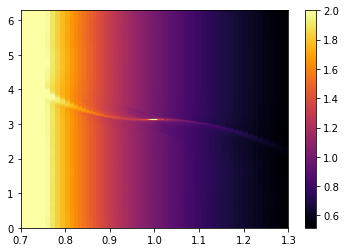

In [5]:
plt.pcolor(data[1],data[2],data[4][-1], vmax = 2, cmap="inferno")
plt.colorbar()
plt.show()

In [6]:
StarR = np.ndarray(1001)
StarTheta = np.ndarray(1001)
newDataX = np.ndarray((1001,1001))
newDataY = np.ndarray((1001,1001))
newDataZ = np.ndarray((1001,1001))
for i in range(1001):
    StarR[i] = 0.9 + 0.2*i/1001
    StarTheta[i] = np.pi*2*i/1000

for i in range(1001):
    for j in range(1001):
        x = StarR[i]
        y = StarTheta[j]
        xVals = data[1]
        yVals = data[2]
        xVel = data[6][-1]
        yVel = data[7][-1]
        zVel = data[8][-1]
        xPoints = binSearch(xVals, 0, len(xVals), x)
        yPoints = binSearch(yVals, 0, len(yVals), y)
        if(xPoints[0] == -np.infty):
            newDataX[i,j] = 0
            newDataY[i,j] = 0
            continue
        elif(xPoints[1] == np.infty):
            newDataX[i,j] = 0
            newDataY[i,j] = 0
            continue
        if(yPoints[0] == -np.infty):
            yPoints = (0, len(yVals)-2)
        elif(yPoints[1] == np.infty):
            yPoints = (len(yVals)-2, 0)
        lowx = xPoints[0]
        highx = xPoints[1]
        lowy = yPoints[0]
        highy = yPoints[1]
        xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
        targetCoords = (x,y)
        minCoords = (xVals[lowx], yVals[lowy])
        maxCoords = (xVals[highx], yVals[highy])
        newDataX[i,j] = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)

        ysquareVals = [yVel[lowy,lowx], yVel[highy,lowx], yVel[lowy,highx], yVel[highy,highx]]
        targetCoords = (x,y)
        minCoords = (xVals[lowx], yVals[lowy])
        maxCoords = (xVals[highx], yVals[highy])
        newDataY[i,j] = biInterpolate(targetCoords, ysquareVals, minCoords, maxCoords)
        
        zsquareVals = [zVel[lowy,lowx], zVel[highy,lowx], zVel[lowy,highx], zVel[highy,highx]]
        targetCoords = (x,y)
        minCoords = (xVals[lowx], yVals[lowy])
        maxCoords = (xVals[highx], yVals[highy])
        newDataZ[i,j] = biInterpolate(targetCoords, zsquareVals, minCoords, maxCoords)

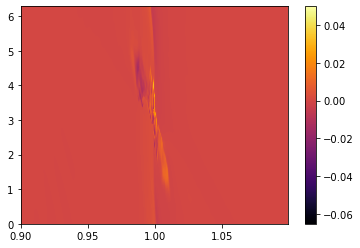

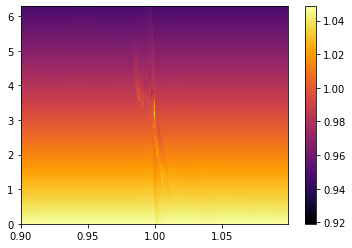

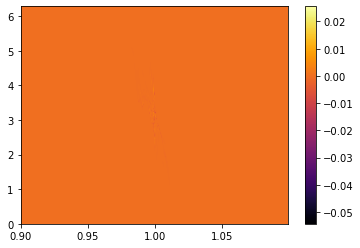

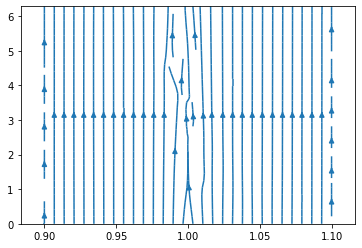

In [7]:
plt.pcolor(StarR,StarTheta, newDataX, cmap = "inferno")
plt.colorbar()
plt.show()

plt.pcolor(StarR,StarTheta,newDataY, cmap = "inferno")
plt.colorbar()
plt.show()

plt.pcolor(StarR, StarTheta, newDataZ, cmap = "inferno")
plt.colorbar()
plt.show()

plt.streamplot(StarR, StarTheta, newDataX, newDataY)
plt.show()

Creating/Transforming Cartesian Grid

In [8]:
#Planetary Coordinates/Velocity
planetCoords = (1, np.pi, np.pi/2)
planetCoordsCart = geo.sphericalToCartesian(planetCoords, dim = 3)
planetVel = (0, 1, 0)
planetVelCart = geo.sphericalToCartesianVelocity(planetCoords, planetVel, dim = 3)

In [9]:
#Creating Corotating Cartesian Grid
coordX = np.ndarray(251)
coordY = np.ndarray(251)
coordZ = np.ndarray(101)

for i in range(251):
    coordX[i] = -data[1][-1] + 2*data[1][-1]*(i)/250
    
for j in range(251):
    coordY[j] = -data[1][-1] + 2*data[1][-1]*(j)/250
    
for k in range(101):
    coordZ[k] = data[1][-1]*(k)/100

rCo = data[6]
thetaCo = data[7]
phiCo = data[8]
for i in range(xres):
    for j in range(yres):
        for k in range(zres):
            thetaCo[k,j,i] = thetaCo[k,j,i] - planetVel[1]*data[1][i]
velCartX = np.ndarray((251,251,101))
velCartY = np.ndarray((251,251,101))
velCartZ = np.ndarray((251,251,101))
dataCo = [data[0], data[1], data[2], data[3], data[4], data[5], rCo, thetaCo, phiCo]
for i in range(251):
    for j in range(251):
        for k in range(101):
            cartesian = (coordX[i], coordY[j], coordZ[k])
            polar = geo.cartesianToSpherical(cartesian, 3)
            v = velocity(polar[0], polar[1], polar[2], dataCo)
            velCartX[i,j,k] = v[0]
            velCartY[i,j,k] = v[1]
            velCartZ[i,j,k] = v[2]

/home/afkirby/PEnGUIn/read/Analysis/geometry.py:28: RuntimeWarning: invalid value encountered in double_scalars
  phi = np.arccos(z/r)


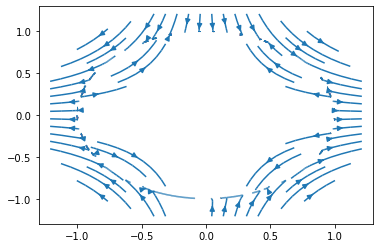

In [10]:
plt.streamplot(coordX, coordY, np.transpose(np.transpose(velCartX)[0]), np.transpose(np.transpose(velCartY)[0]))